In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('data/test.csv', header=None)
df.columns = ['q1','q2','mid','final']
df

,q1,q2,mid,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [3]:
x_data = df.iloc[:, :-1].values
y_data = df.iloc[:, [-1] ].values

In [4]:
x_data

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]])

In [8]:
class Test:
    def __init__(self, a,b): #생성자 함수
        self.a = a
        self.b = b
    def show(self):
        print( self.a , self.b )
    def __repr__(self):
        return f'a={self.a} b={self.b}'
    def __call__(self, a,b):
        print( 'call',a,b)
obj = Test(10,20) 
# obj.__init__(obj, 10,20) #파이썬
obj.show()# obj.show(obj)
print( obj ) #obj.__repr__()
obj(100,200) # obj.__call__(100,200)

10 20
a=10 b=20
call 100 200


In [10]:
class MyDense():
    def __init__(self, units, input_dim):
        self.w = tf.random.uniform( [input_dim,units] )
        self.b = tf.random.uniform( [units] )
    def get_weights(self):
        return self.w, self.b
    def __call__(self, xd ):
        hx = tf.matmul( xd, self.w) + self.b
        return hx
#dense.__call__(tf.constant( [[90,80,70]] ) )    
dense = MyDense( units=1, input_dim=3)
dense( tf.constant( [[90,80,70]] ,tf.float32) ) 

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[145.04712]], dtype=float32)>

In [11]:
dense = Dense( units=1, input_dim=3)# w:3x1, b:1
model = Sequential( [dense] )
model.compile( loss='mse', optimizer= Adam(0.1) )
h = model.fit( x_data, y_data, epochs= 500)

Epoch 1/500


c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - loss: 4248.9116
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1674.6819
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 316.1010
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 32.7263
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 434.0420
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 955.3021
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1199.2926
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1098.7886
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 780.8019
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 414.8580
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 137.4106
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 20.8089
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 64.1892
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 205.1329
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 353.7726

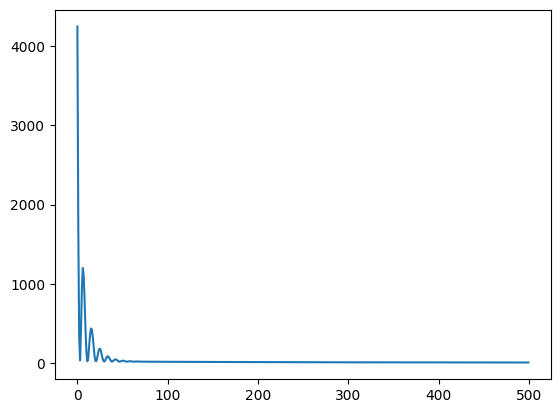

In [15]:
plt.plot( h.history['loss'] )
plt.show()

In [17]:
w, b = dense.get_weights()
print( w )
print( b)

[[0.26692602]
 [0.65074575]
 [1.0979444 ]]
[-0.16358942]


In [16]:
# 2분 퀴즈 q1:90, q2:85 mid:95 최종점수를 예측하시요
dense( tf.constant( [[90,85,95]], tf.float32) )

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[183.47786]], dtype=float32)>

In [ ]:
model.predict( np.array( [[90,85,95]] )  ) 
# 1.전처리( 실수변환)
# 2. dense( xd )
# 3.  dense forward 연산결과를 numpy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[183.47786]], dtype=float32)